In [1]:
%matplotlib inline

==========================
MS, 20191003


In [1]:
basedir='/home/rms101/SCRIPTS/amoc_stab/'
import sys
sys.path.append(basedir + 'MODS')
import os
import cmipdata as cd
import numpy as np
import matplotlib.pyplot as plt # for basic plotting
import matplotlib as mpl
import rms_plots as rpl
import rms_utils as rut
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MultipleLocator
################settings
#rundir='/HOME/rms/SCRIPTS/6_OTHER/6PARIS-STAB/5SL/';os.chdir(rundir)
#mpl.style.reload_library()
plt.style.use('rms_paper')

registering cmaps
registering cmaps


1a. Calculate GM annual mean TAS timeseries LE
#####################################################

In [2]:
rundir='/home/rms101/SCRIPTS/amoc_stab/FIG2_SL/';os.chdir(rundir)
srcdir_base='/space/hall3/sitestore/eccc/crd/ccrn/users/rms101/DATA/amoc_stab_post/' 
do_calc=False

if do_calc:
    os.system('mkdir -p {}/DATA_SL'.format(srcdir_base))
    os.chdir('{}/DATA_SL'.format(srcdir_base))
    os.system('/bin/rm *.nc')

    # link to Oleg's files and put in right format for cmipdata
    for i in np.arange(1,5+1):
      cmd1=('ln -s {}/4Michael/hist_RCP85_NEW/steric_2D_anom_rcp85_vs_piControl_r{}.nc'.format(srcdir_base,i) +
                    ' steric_Omon_CanESM2_historical_r{}i1p1f1_195001-210012.nc'.format(i))
      cmd2=('ln -s {}/4Michael/1_5_deg_NEW/steric_2D_anom_15deg_vs_piControl_r{}.nc'.format(srcdir_base,i) +
                    ' steric_Omon_CanESM2_lowwarming15_r{}i1p1f1_202101-260012.nc'.format(i))
 
      cmd3=('ln -s {}/4Michael/2_0_deg_NEW/steric_2D_anom_20deg_vs_piControl_r{}.nc'.format(srcdir_base,i) +
                    ' steric_Omon_CanESM2_lowwarming20_r{}i1p1f1_203601-260012.nc'.format(i))

      cmd4=('ln -s {}/4Michael/3_0_deg_NEW/steric_2D_anom_30deg_vs_piControl_r{}.nc'.format(srcdir_base,i) +
                    ' steric_Omon_CanESM2_lowwarming30_r{}i1p1f1_206101-260012.nc'.format(i))

      cmd5=('ln -s {}/4Michael/3_0_deg_NEW/steric_2D_ther_30deg_vs_piControl_r{}.nc'.format(srcdir_base,i) +
                    ' stericther_Omon_CanESM2_lowwarming30_r{}i1p1f1_206101-260012.nc'.format(i))

      os.system(cmd1)
      os.system(cmd2)
      os.system(cmd3)
      os.system(cmd4)
      os.system(cmd5)

    ens_his=cd.mkensemble('steric_Omon*historical*.nc')
    ens_15c=cd.mkensemble('steric_Omon*lowwarming15*.nc')
    ens_20c=cd.mkensemble('steric_Omon*lowwarming20*.nc')
    ens_30c=cd.mkensemble('steric_Omon*lowwarming30*.nc')
    ens_30ct=cd.mkensemble('stericther_Omon*lowwarming30*.nc')

    # global mean
    my_cdo_str='cdo -fldmean {infile} {outfile}' 
    ens_his_gm=cd.my_operator(ens_his, my_cdo_str, output_prefix='gm_',delete=False)
    ens_15c_gm=cd.my_operator(ens_15c, my_cdo_str, output_prefix='gm_',delete=False)
    ens_20c_gm=cd.my_operator(ens_20c, my_cdo_str, output_prefix='gm_',delete=False)
    ens_30c_gm=cd.my_operator(ens_30c, my_cdo_str, output_prefix='gm_',delete=False)
    ens_30ct_gm=cd.my_operator(ens_30ct, my_cdo_str, output_prefix='gm_',delete=False)
    # 45-65 North Atlantic
    my_cdo_str='cdo -fldmean -sellonlatbox,0,360,45,65 -ifthen ' + rundir +'atlantic_mask.nc {infile} {outfile}' 
    print my_cdo_str
    ens_his_na=cd.my_operator(ens_his, my_cdo_str, output_prefix='na_',delete=False)
    ens_15c_na=cd.my_operator(ens_15c, my_cdo_str, output_prefix='na_',delete=False)
    ens_20c_na=cd.my_operator(ens_20c, my_cdo_str, output_prefix='na_',delete=False)
    ens_30c_na=cd.my_operator(ens_30c, my_cdo_str, output_prefix='na_',delete=False)
    ens_30ct_na=cd.my_operator(ens_30ct, my_cdo_str, output_prefix='na_',delete=False)

else:
    os.chdir('{}/DATA_SL'.format(srcdir_base))     
    ens_his_gm=cd.mkensemble('gm_*_historical*',prefix='gm_')
    ens_15c_gm=cd.mkensemble('gm_*_lowwarming15*',prefix='gm_')
    ens_20c_gm=cd.mkensemble('gm_*_lowwarming20*',prefix='gm_')
    ens_30c_gm=cd.mkensemble('gm_steric_Omon_*_lowwarming30*',prefix='gm_')
    ens_30ct_gm=cd.mkensemble('gm_stericther_Omon_*_lowwarming30*',prefix='gm_')

    ens_his_na=cd.mkensemble('na_*_historical*',prefix='na_')
    ens_15c_na=cd.mkensemble('na_*_lowwarming15*',prefix='na_')
    ens_20c_na=cd.mkensemble('na_*_lowwarming20*',prefix='na_')
    ens_30c_na=cd.mkensemble('na_steric_Omon_*_lowwarming30*',prefix='na_')
    ens_30ct_na=cd.mkensemble('na_stericther_Omon_*_lowwarming30*',prefix='na_')

###lonlat
ens_his=cd.mkensemble('steric_Omon*historical*.nc')
ens_15c=cd.mkensemble('steric_Omon*lowwarming15*.nc')
ens_20c=cd.mkensemble('steric_Omon*lowwarming20*.nc')
ens_30c=cd.mkensemble('steric_Omon*lowwarming30*.nc')
lon=cd.loadfiles(ens_15c,'steric')['dimensions']['lon']; nlon=lon.size
lat=cd.loadfiles(ens_15c,'steric')['dimensions']['lat']; nlat=lat.size
x_his=cd.loadfiles(ens_his,'steric')['data']*100.
x_15c=cd.loadfiles(ens_15c,'steric')['data']*100.
x_20c=cd.loadfiles(ens_20c,'steric')['data']*100.
x_30c=cd.loadfiles(ens_30c,'steric')['data']*100.

x_his[x_his==0]=np.NaN
x_15c[x_15c==0]=np.NaN
x_20c[x_20c==0]=np.NaN
x_30c[x_30c==0]=np.NaN

###gm
x_his_gm=cd.loadfiles(ens_his_gm,'steric')['data']*100.
x_15c_gm=cd.loadfiles(ens_15c_gm,'steric')['data']*100.
x_20c_gm=cd.loadfiles(ens_20c_gm,'steric')['data']*100.
x_30c_gm=cd.loadfiles(ens_30c_gm,'steric')['data']*100.
x_30ct_gm=cd.loadfiles(ens_30ct_gm,'steric')['data']*100.


x_c_gm=np.mean(x_his_gm[:,0:20],axis=1)

x_his_gm=x_his_gm-np.transpose(np.tile(x_c_gm,(151,1)))
x_15c_gm=x_15c_gm-np.transpose(np.tile(x_c_gm,(580,1)))
x_20c_gm=x_20c_gm-np.transpose(np.tile(x_c_gm,(565,1)))
x_30c_gm=x_30c_gm-np.transpose(np.tile(x_c_gm,(540,1)))
x_30ct_gm=x_30ct_gm-np.transpose(np.tile(x_c_gm,(540,1)))
x_30ch_gm=x_30c_gm-x_30ct_gm


###na
x_his_na=cd.loadfiles(ens_his_na,'steric')['data']*100.
x_15c_na=cd.loadfiles(ens_15c_na,'steric')['data']*100.
x_20c_na=cd.loadfiles(ens_20c_na,'steric')['data']*100.
x_30c_na=cd.loadfiles(ens_30c_na,'steric')['data']*100.
x_30ct_na=cd.loadfiles(ens_30ct_na,'steric')['data']*100.
x_30ch_na=x_30c_na-x_30ct_na



os.chdir(rundir)


x_c_na=np.mean(x_his_na[:,0:20],axis=1)

x_his_na=x_his_na-np.transpose(np.tile(x_c_na,(151,1)))
x_15c_na=x_15c_na-np.transpose(np.tile(x_c_na,(580,1)))
x_20c_na=x_20c_na-np.transpose(np.tile(x_c_na,(565,1)))
x_30c_na=x_30c_na-np.transpose(np.tile(x_c_na,(540,1)))

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.

2. Plot
#####################################################

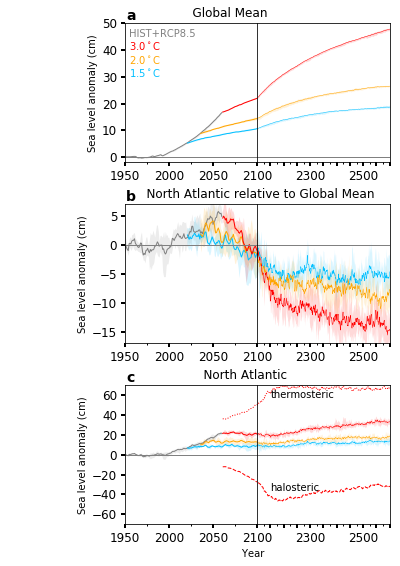

In [4]:
####### years    
years_his=np.arange(1950,2060+1)
years_15c=np.arange(2021,2600+1)
years_20c=np.arange(2036,2600+1)
years_30c=np.arange(2061,2600+1)
x_his_gm=x_his_gm[:,0:rut.find_nearest(years_his,2060)+1]
x_his_na=x_his_na[:,0:rut.find_nearest(years_his,2060)+1]

####### plot functions    
def set_xaxis1 (ax):
  ax.set_xlim([1950, 2100]) 
  ax.xaxis.set_major_locator(MultipleLocator(50))
  ax.xaxis.set_minor_locator(MultipleLocator(25)) 

def set_xaxis2 (ax):
  ax.set_xlim([2100, 2600]) 
  ax.xaxis.set_major_locator(MultipleLocator(50))
  ax.xaxis.set_minor_locator(MultipleLocator(25)) 
  ax.set_xticklabels(('','','','','','2300','','','','2500'))

def plot_x(ax,years,x,color,linewidth):
  kwargs={'linewidth': linewidth, 'color': color}
  ax.plot(years,np.mean(x,axis=0),**kwargs)                                    
  # range
  kwargs={'color':color, 'alpha': 0.15, 'linewidth': 0}
  ax.fill_between(years,np.min(x,axis=0), np.max(x,axis=0),**kwargs)
  #ax.fill_between(years,np.mean(x,axis=0)-np.std(x,axis=0), np.mean(x,axis=0)+np.std(x,axis=0),**kwargs)

def plot_x2(ax,years,x,color,linewidth,linestyle='-'):
  kwargs={'linewidth': linewidth, 'color': color,'linestyle': linestyle}
  ax.plot(years,np.mean(x,axis=0),**kwargs)                                    
  # range
  #kwargs={'color':color, 'alpha': 0.15, 'linewidth': 0}
  #ax.fill_between(years,np.min(x,axis=0), np.max(x,axis=0),**kwargs)
  #ax.fill_between(years,np.mean(x,axis=0)-np.std(x,axis=0), np.mean(x,axis=0)+np.std(x,axis=0),**kwargs)



#Figure    
fig = plt.figure(constrained_layout=False,figsize=(8,12))
gs1 = gridspec.GridSpec(nrows=3, ncols=2, left=0.02, right=0.48,
                        wspace=0,hspace=0.3,bottom=0.3)
ax1 = fig.add_subplot(gs1[0, 0])
ax2 = fig.add_subplot(gs1[0, 1])
ax3 = fig.add_subplot(gs1[1, 0])
ax4 = fig.add_subplot(gs1[1, 1])
ax5 = fig.add_subplot(gs1[2, 0])
ax6 = fig.add_subplot(gs1[2, 1])

####### a) global    

#col1:1950-2100
ax=ax1
set_xaxis1(ax)
ax.set_ylim([-2, 50.1])
ax.yaxis.set_major_locator(MultipleLocator(10))
plot_x(ax,years_his,x_his_gm,'gray',1)
plot_x(ax,years_15c,x_15c_gm,'deepskyblue',1)
plot_x(ax,years_20c,x_20c_gm,'orange',1)
plot_x(ax,years_30c,x_30c_gm,'red',1)


ax.set_ylabel('Sea level anomaly (cm)')
ax.axhline(y=0.0,color="gray",linestyle='-',linewidth=1)

#legend##
ax.text(1955,45,'HIST+RCP8.5',color= 'gray')
ax.text(1955,40,'3.0$^\circ$C',color= 'red')
ax.text(1955,35,'2.0$^\circ$C',color= 'orange')
ax.text(1955,30,'1.5$^\circ$C',color= 'deepskyblue')

rpl.add_title(ax1,'                    Global Mean','a')


#col2:2100-2600
ax=ax2
set_xaxis2(ax)
ax.set_ylim([-2, 50.1])
ax.set_yticklabels((''));ax.yaxis.set_tick_params(length=0,width=0)

plot_x(ax,years_his,x_his_gm,'gray',0.5)
plot_x(ax,years_15c,x_15c_gm,'deepskyblue',0.5)
plot_x(ax,years_20c,x_20c_gm,'orange',0.5)
plot_x(ax,years_30c,x_30c_gm,'red',0.5)

ax.axhline(y=0.0,color="gray",linestyle='-',linewidth=1)



####### b) North Atlantic relative to global mean    

#col1:1950-2100
ax=ax3

set_xaxis1(ax)
ax.set_ylim([-17, 7])
ax.yaxis.set_major_locator(MultipleLocator(5))

plot_x(ax,years_his,x_his_na-x_his_gm,'gray',1)
plot_x(ax,years_15c,x_15c_na-x_15c_gm,'deepskyblue',1)
plot_x(ax,years_20c,x_20c_na-x_20c_gm,'orange',1)
plot_x(ax,years_30c,x_30c_na-x_30c_gm,'red',1)


ax.set_ylabel('Sea level anomaly (cm)')
ax.axhline(y=0.0,color="gray",linestyle='-',linewidth=1)
rpl.add_title(ax3,'                                    North Atlantic relative to Global Mean','b')

#col2:2100-2600
ax=ax4

set_xaxis2(ax)
ax.set_ylim([-17, 7])
ax.set_yticklabels((''));ax.yaxis.set_tick_params(length=0,width=0)

plot_x(ax,years_his,x_his_na-x_his_gm,'gray',0.5)
plot_x(ax,years_15c,x_15c_na-x_15c_gm,'deepskyblue',0.5)
plot_x(ax,years_20c,x_20c_na-x_20c_gm,'orange',0.5)
plot_x(ax,years_30c,x_30c_na-x_30c_gm,'red',0.5)


ax.axhline(y=0.0,color="gray",linestyle='-',linewidth=1)



####### c) North Atlantic    

#col1:1950-2100
ax=ax5

set_xaxis1(ax)
ax.set_xlabel('                                        Year')

ax.set_ylim([-70.1, 70.1])
ax.yaxis.set_major_locator(MultipleLocator(20))

plot_x(ax,years_his,x_his_na,'gray',1)
plot_x(ax,years_15c,x_15c_na,'deepskyblue',1)
plot_x(ax,years_20c,x_20c_na,'orange',1)
plot_x(ax,years_30c,x_30c_na,'red',1)
plot_x2(ax,years_30c,x_30ct_na,'red',1,linestyle='dotted')
plot_x2(ax,years_30c,x_30ch_na,'red',1,linestyle='dashed')


ax.set_ylabel('Sea level anomaly (cm)')
ax.axhline(y=0.0,color="gray",linestyle='-',linewidth=1)
rpl.add_title(ax5,'                            North Atlantic','c')



#col2:2100-2600
ax=ax6
set_xaxis2(ax)
ax.set_ylim([-70.1, 70.1])
ax.set_yticklabels((''))
ax.yaxis.set_tick_params(length=0,width=0)

plot_x(ax,years_his,x_his_na,'gray',0.5)
plot_x(ax,years_15c,x_15c_na,'deepskyblue',0.5)
plot_x(ax,years_20c,x_20c_na,'orange',0.5)
plot_x(ax,years_30c,x_30c_na,'red',0.5)
plot_x2(ax,years_30c,x_30ct_na,'red',1,linestyle='dotted')
plot_x2(ax,years_30c,x_30ch_na,'red',1,linestyle='dashed')

ax.axhline(y=0.0,color="gray",linestyle='-',linewidth=1)

#legend##
ax.text(2150,57,'thermosteric')
ax.text(2150,-37,'halosteric')



# plots=====================================
#
#rpl.add_title(ax,'global')
rpl.mysavefig(fig,'fig2.png')
rpl.mysavefig(fig,'fig2.pdf')


3. Numbers
#####################################################

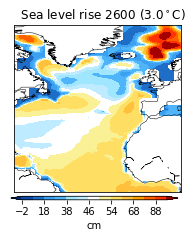

In [77]:
######################################################
# 3. Plot clim
######################################################
clevs=np.array([-50,-40,-30,-20,-10,-6,-2,2,6,10,20,30,40,50])

clevs=np.array([-50,-40,-30,-20,-10,-6,-2,2,6,10,20,30,40,50])+48

cmapi=np.array([0,1,2,3,4,6,7,9,10,11,12,13,14,15,18])
ncol=1; nrow=1
bmparams=dict(region='na')
cfparams=dict(clevs=clevs,plot_co=False,cmapi=cmapi)

##########Clims 1
fig, axs = plt.subplots(nrow,ncol, figsize=(ncol*3,nrow*3.25)); 
plt.subplots_adjust(wspace=0.1,hspace=0.1)
##########Clims 1
#x=np.mean(x_30c[:,-1,:,:],axis=0).squeeze()-np.mean(x_30c_gm,axis=0)[-1]
x=np.mean(x_30c[:,-1,:,:],axis=0).squeeze()
ax=axs
bm=rpl.make_bm(ax,**bmparams)
cf=rpl.add_cf(bm,lon,lat,x,**cfparams)   
rpl.add_title(ax,'   Sea level rise 2600 (3.0$^\circ$C)')
rpl.add_cb(ax,cf,units='cm',orientation='horizontal',y0scale=-0.2,x0scale=0.9,spacing='uniform')
rpl.mysavefig(fig,'SL_NA')

In [34]:
clevs=range(-17,17+2,2)
print clevs

[-17, -15, -13, -11, -9, -7, -5, -3, -1, 1, 3, 5, 7, 9, 11, 13, 15, 17]


In [10]:
sl_15c_gm=np.mean(x_15c_gm,axis=0)[-1]
sl_15c_na=np.mean(x_15c_na,axis=0)[-1]

sl_20c_gm=np.mean(x_20c_gm,axis=0)[-1]
sl_20c_na=np.mean(x_20c_na,axis=0)[-1]

sl_30c_gm=np.mean(x_30c_gm,axis=0)[-1]
sl_30c_na=np.mean(x_30c_na,axis=0)[-1]


print 'SLR 15c by 2600 GM:' + '%6.2f' % sl_15c_gm 
print 'SLR 15c by 2600 NA:' + '%6.2f' % sl_15c_na 
print 'SLR 15c by 2600 NA-GM:' + '%6.2f' % (sl_15c_na-sl_15c_gm) 
print 'SLR 15c by 2600 NA-GM:' + '%6.2f' % ((sl_15c_na-sl_15c_gm)*100/sl_15c_gm) 
print ''
print 'SLR 20c by 2600 GM:' + '%6.2f' % sl_20c_gm 
print 'SLR 20c by 2600 NA:' + '%6.2f' % sl_20c_na 
print 'SLR 20c by 2600 NA-GM:' + '%6.2f' % (sl_20c_na-sl_20c_gm) 
print 'SLR 20c by 2600 NA-GM:' + '%6.2f' % ((sl_20c_na-sl_20c_gm)*100/sl_20c_gm) 
print ''
print 'SLR 30c by 2600 GM:' + '%6.2f' % sl_30c_gm 
print 'SLR 30c by 2600 NA:' + '%6.2f' % sl_30c_na 
print 'SLR 30c by 2600 NA-GM:' + '%6.2f' % (sl_30c_na-sl_30c_gm) 
print 'SLR 30c by 2600 NA-GM:' + '%6.2f' % ((sl_30c_na-sl_30c_gm)*100/sl_30c_gm) 


  

SLR 15c by 2600 GM: 18.65
SLR 15c by 2600 NA: 13.98
SLR 15c by 2600 NA-GM: -4.67
SLR 15c by 2600 NA-GM:-25.04

SLR 20c by 2600 GM: 26.50
SLR 20c by 2600 NA: 18.67
SLR 20c by 2600 NA-GM: -7.83
SLR 20c by 2600 NA-GM:-29.54

SLR 30c by 2600 GM: 47.89
SLR 30c by 2600 NA: 33.15
SLR 30c by 2600 NA-GM:-14.74
SLR 30c by 2600 NA-GM:-30.78
